In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("/content/globalterrorismdb.csv", encoding='latin1')

df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
df['casualities']=df['Killed']+df['Wounded']
df.head(5)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [4]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

In [5]:
print('Country with Highest Terrorist Attacks:',df['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',df['Killed'].max(),'that took place in',df.loc[df['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181055 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
 17  casualities  164817 non-null  float64
dtypes: float64(5), int64(3),

In [7]:
df.drop_duplicates(inplace=True)
df.fillna(0, inplace=True)

# Terrorist Attacks Over Time: Visualize the number of attacks over the years.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
#from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc

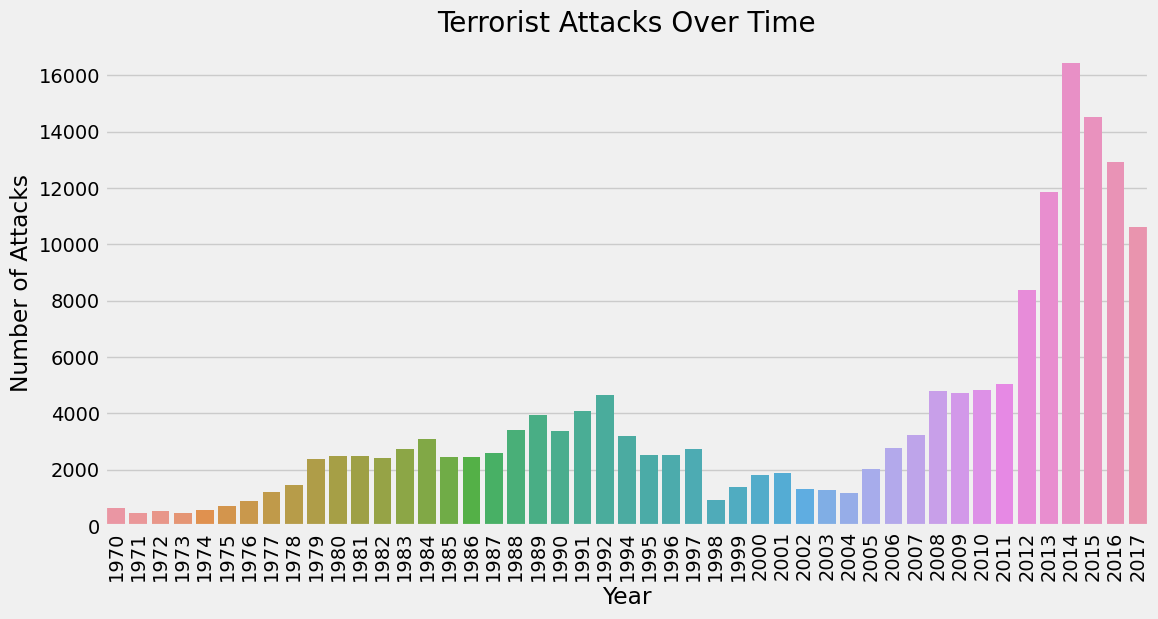

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Terrorist Attacks Over Time')
plt.show()

# Attack Types: Explore the types of terrorist attacks.

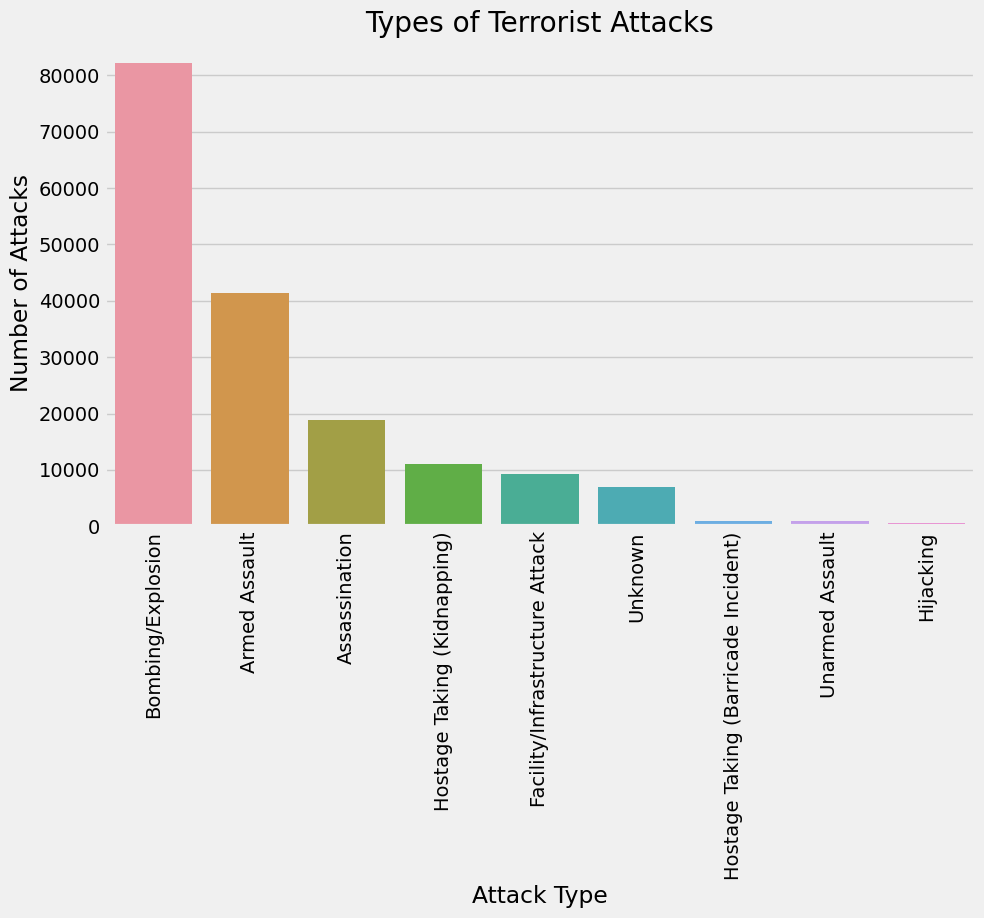

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AttackType', data=df, order=df['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.title('Types of Terrorist Attacks')
plt.show()

# Target Types: Analyze the types of targets.


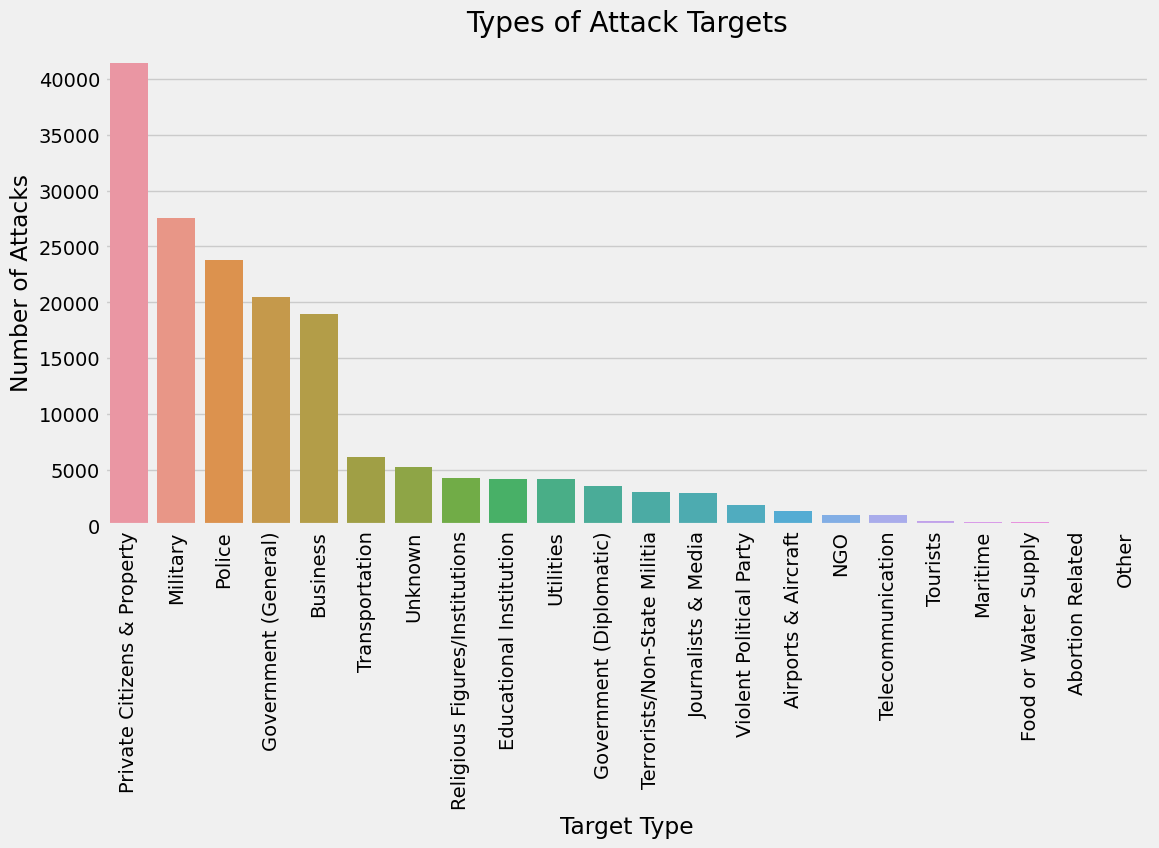

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Target_type', data=df, order=df['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Target Type')
plt.ylabel('Number of Attacks')
plt.title('Types of Attack Targets')
plt.show()

# Countries Most Affected: Determine which countries are most affected by terrorism

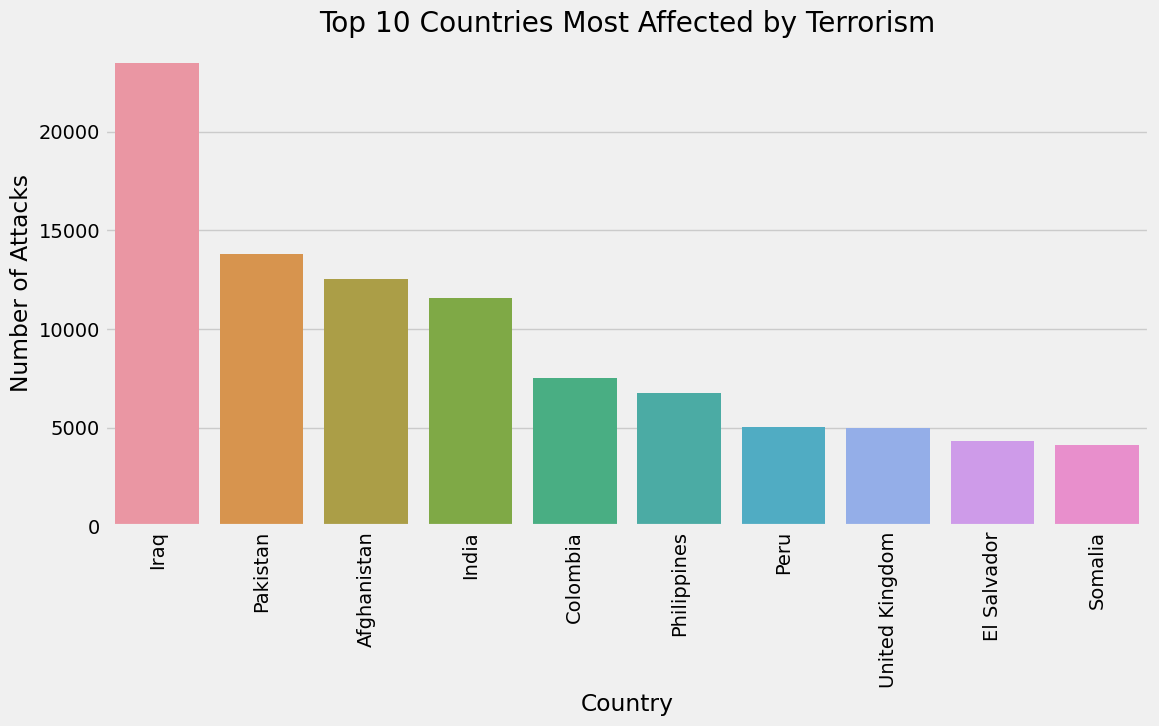

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Country'].value_counts().head(10).index, y=df['Country'].value_counts().head(10).values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.title('Top 10 Countries Most Affected by Terrorism')
plt.show()

# Heatmap of Correlations: Visualize correlations between numeric features.

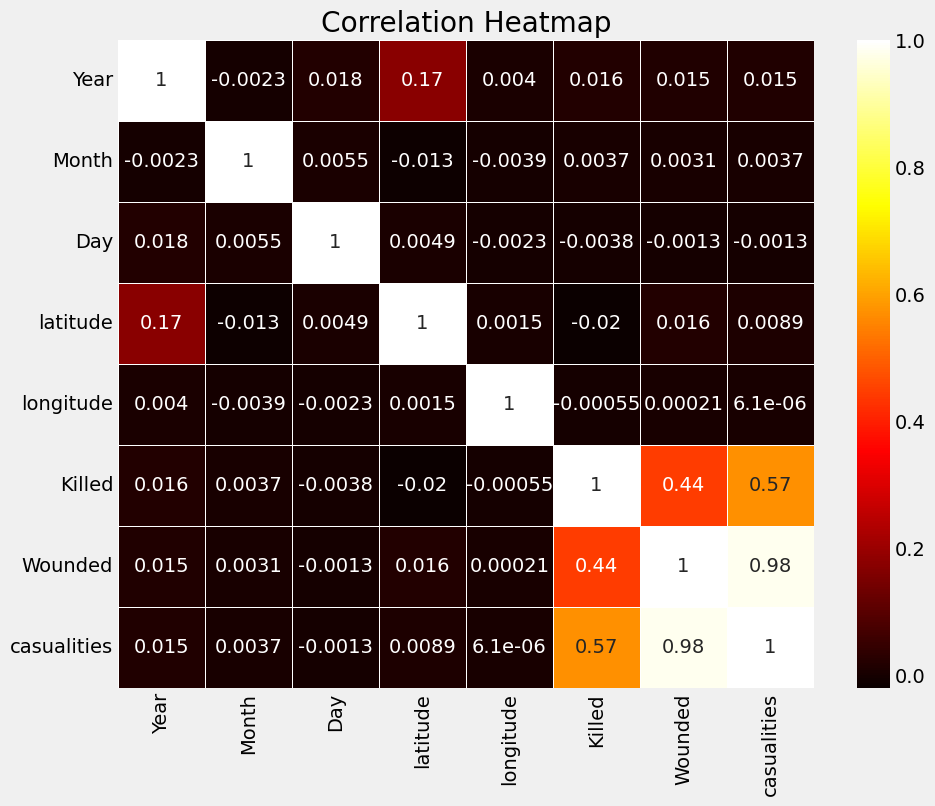

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='hot', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Geographic Analysis

In [ ]:
import plotly.express as px
fig = px.scatter_geo(
    df,
    lat='latitude',
    lon='longitude',
    color='Killed',
    hover_name='Country',
    scope='world',
    title='Terrorist Attacks Worldwide'
)
fig.show()

# Trend in terrorist attacks

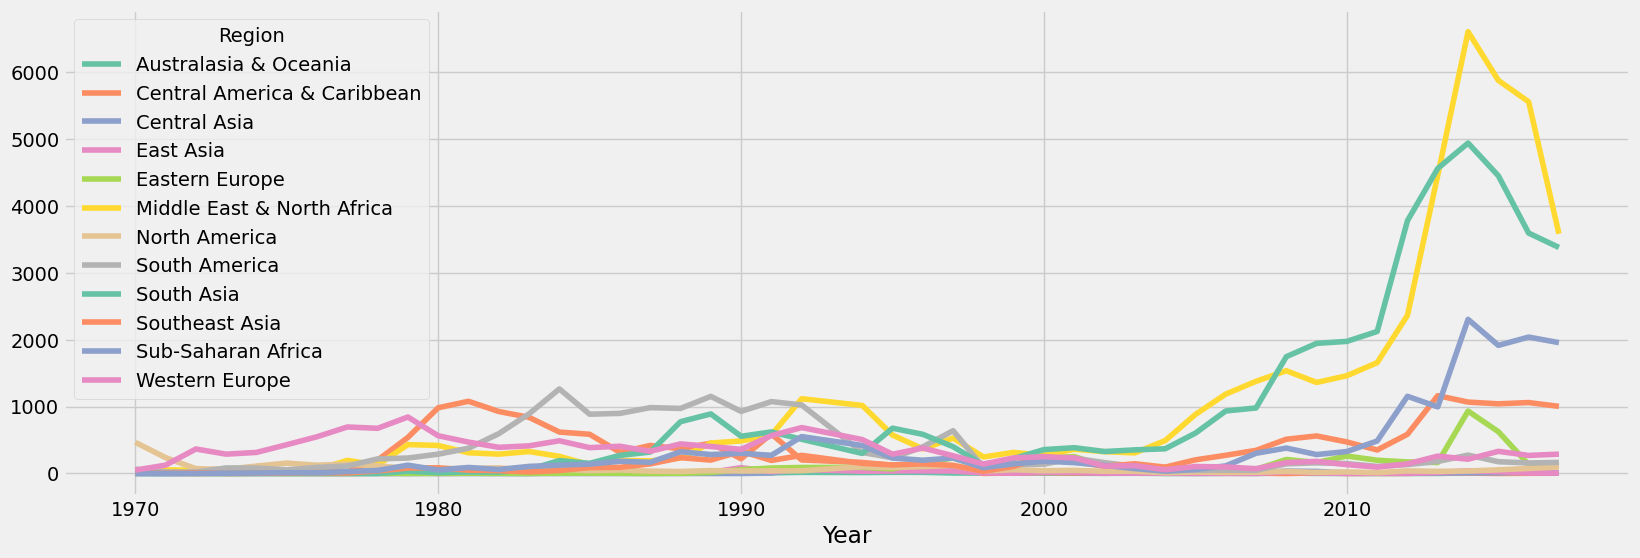

In [15]:
terror_region=pd.crosstab(df.Year,df.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

# AttackType vs Region

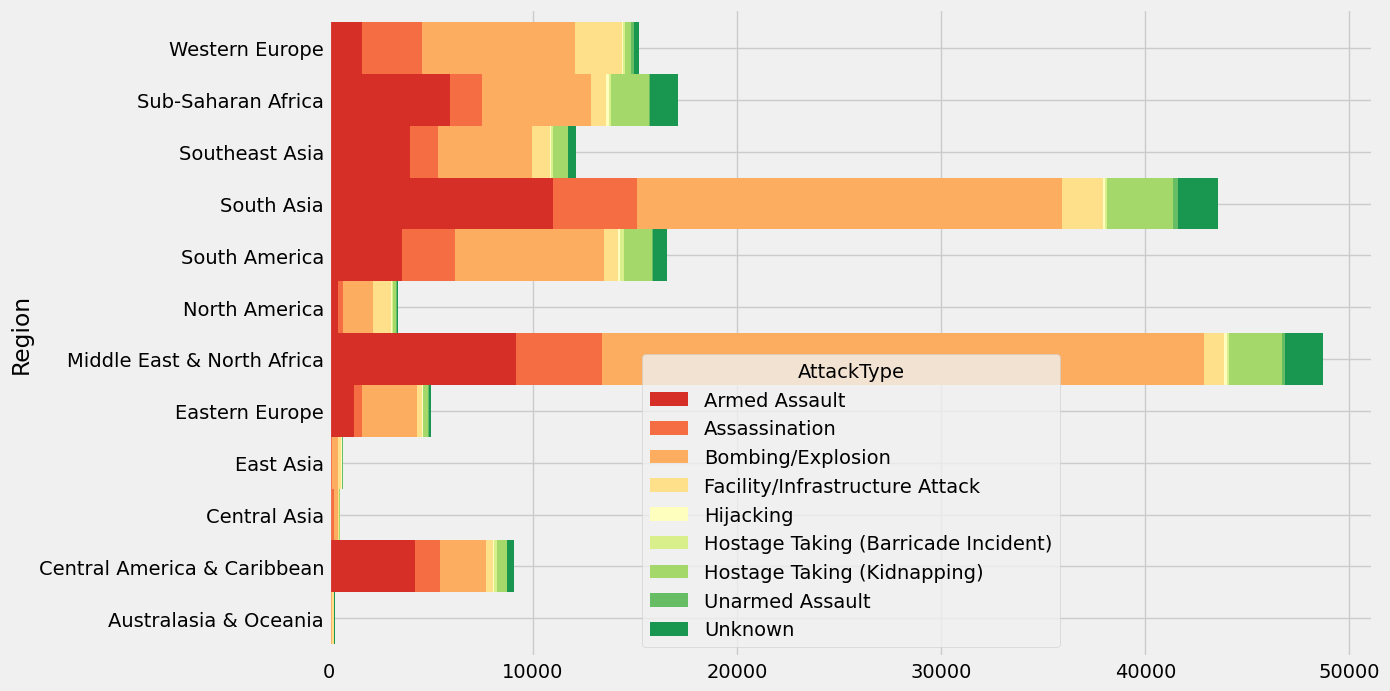

In [16]:
pd.crosstab(df.Region,df.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

# Attacks vs Killed

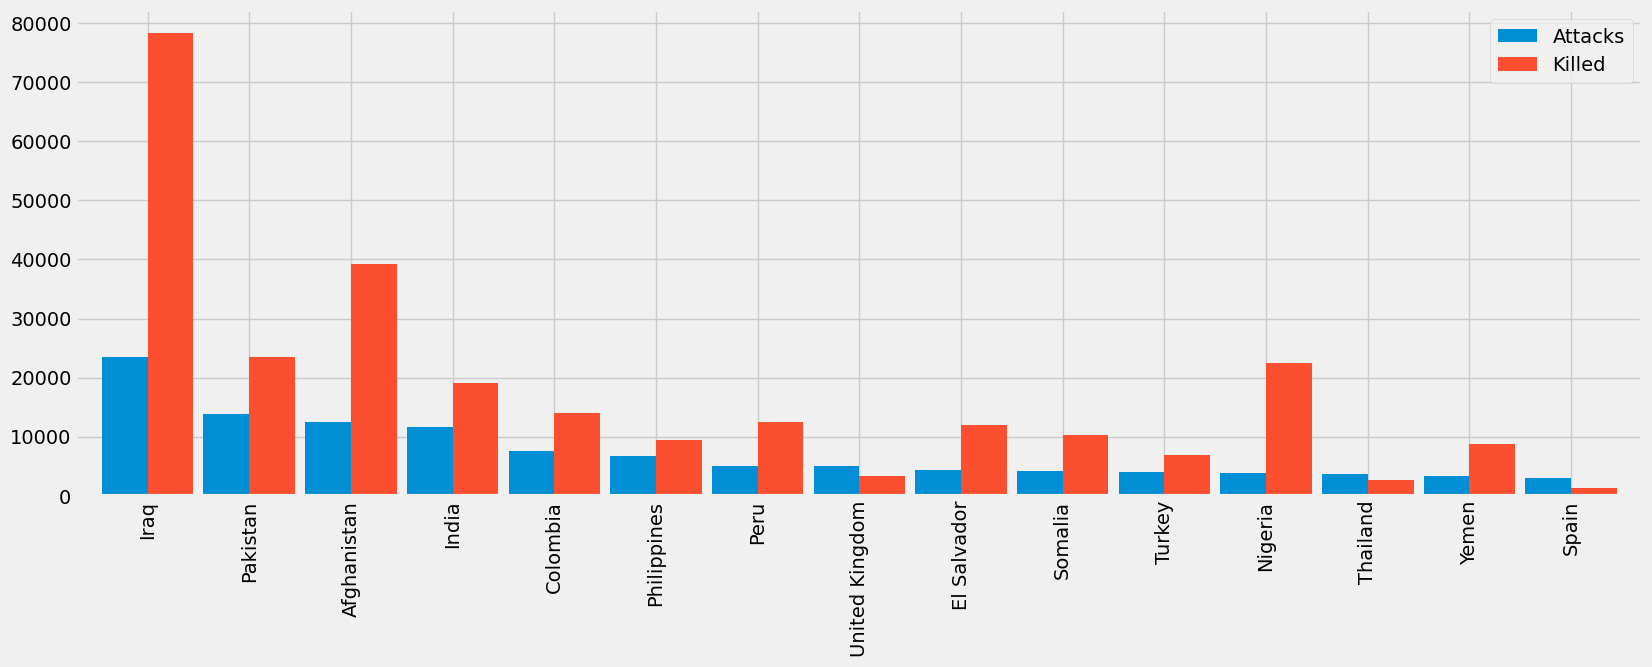

In [17]:

coun_terror=df['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=df.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

# Activity of Top Terrorist Groups


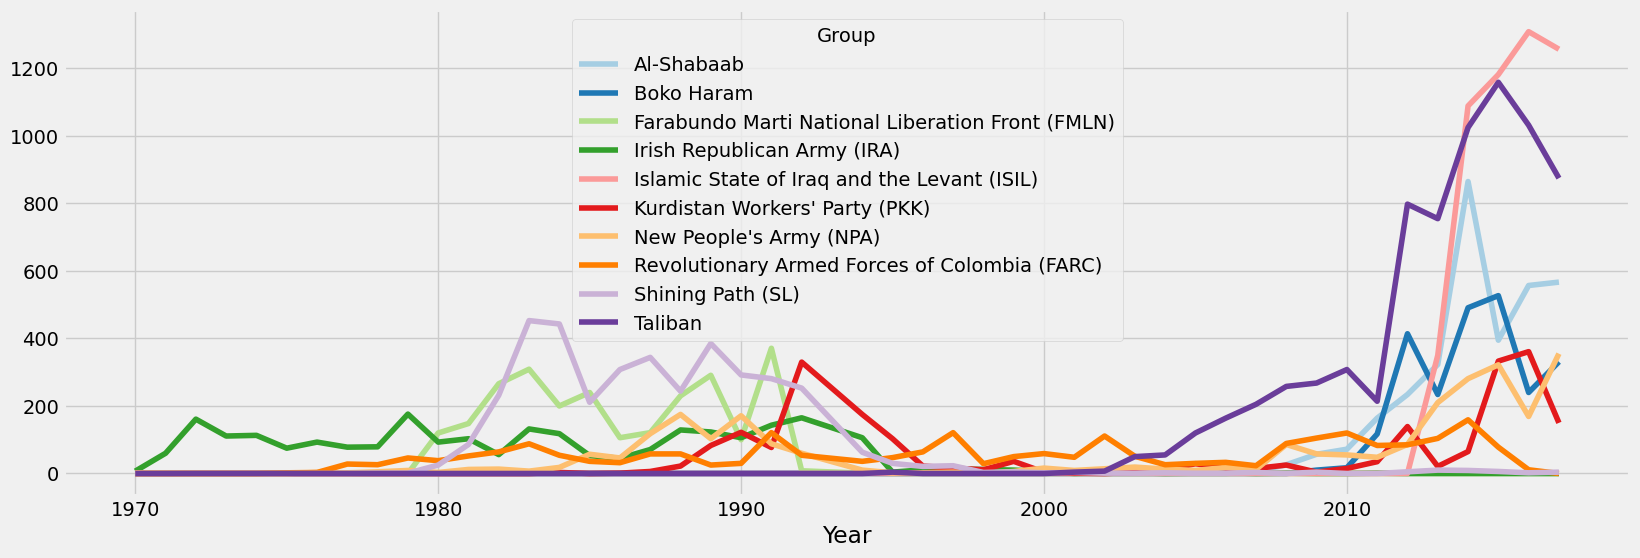

In [18]:
top_groups10=df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

# Most Notorious Groups in India and Favorite Attack Types


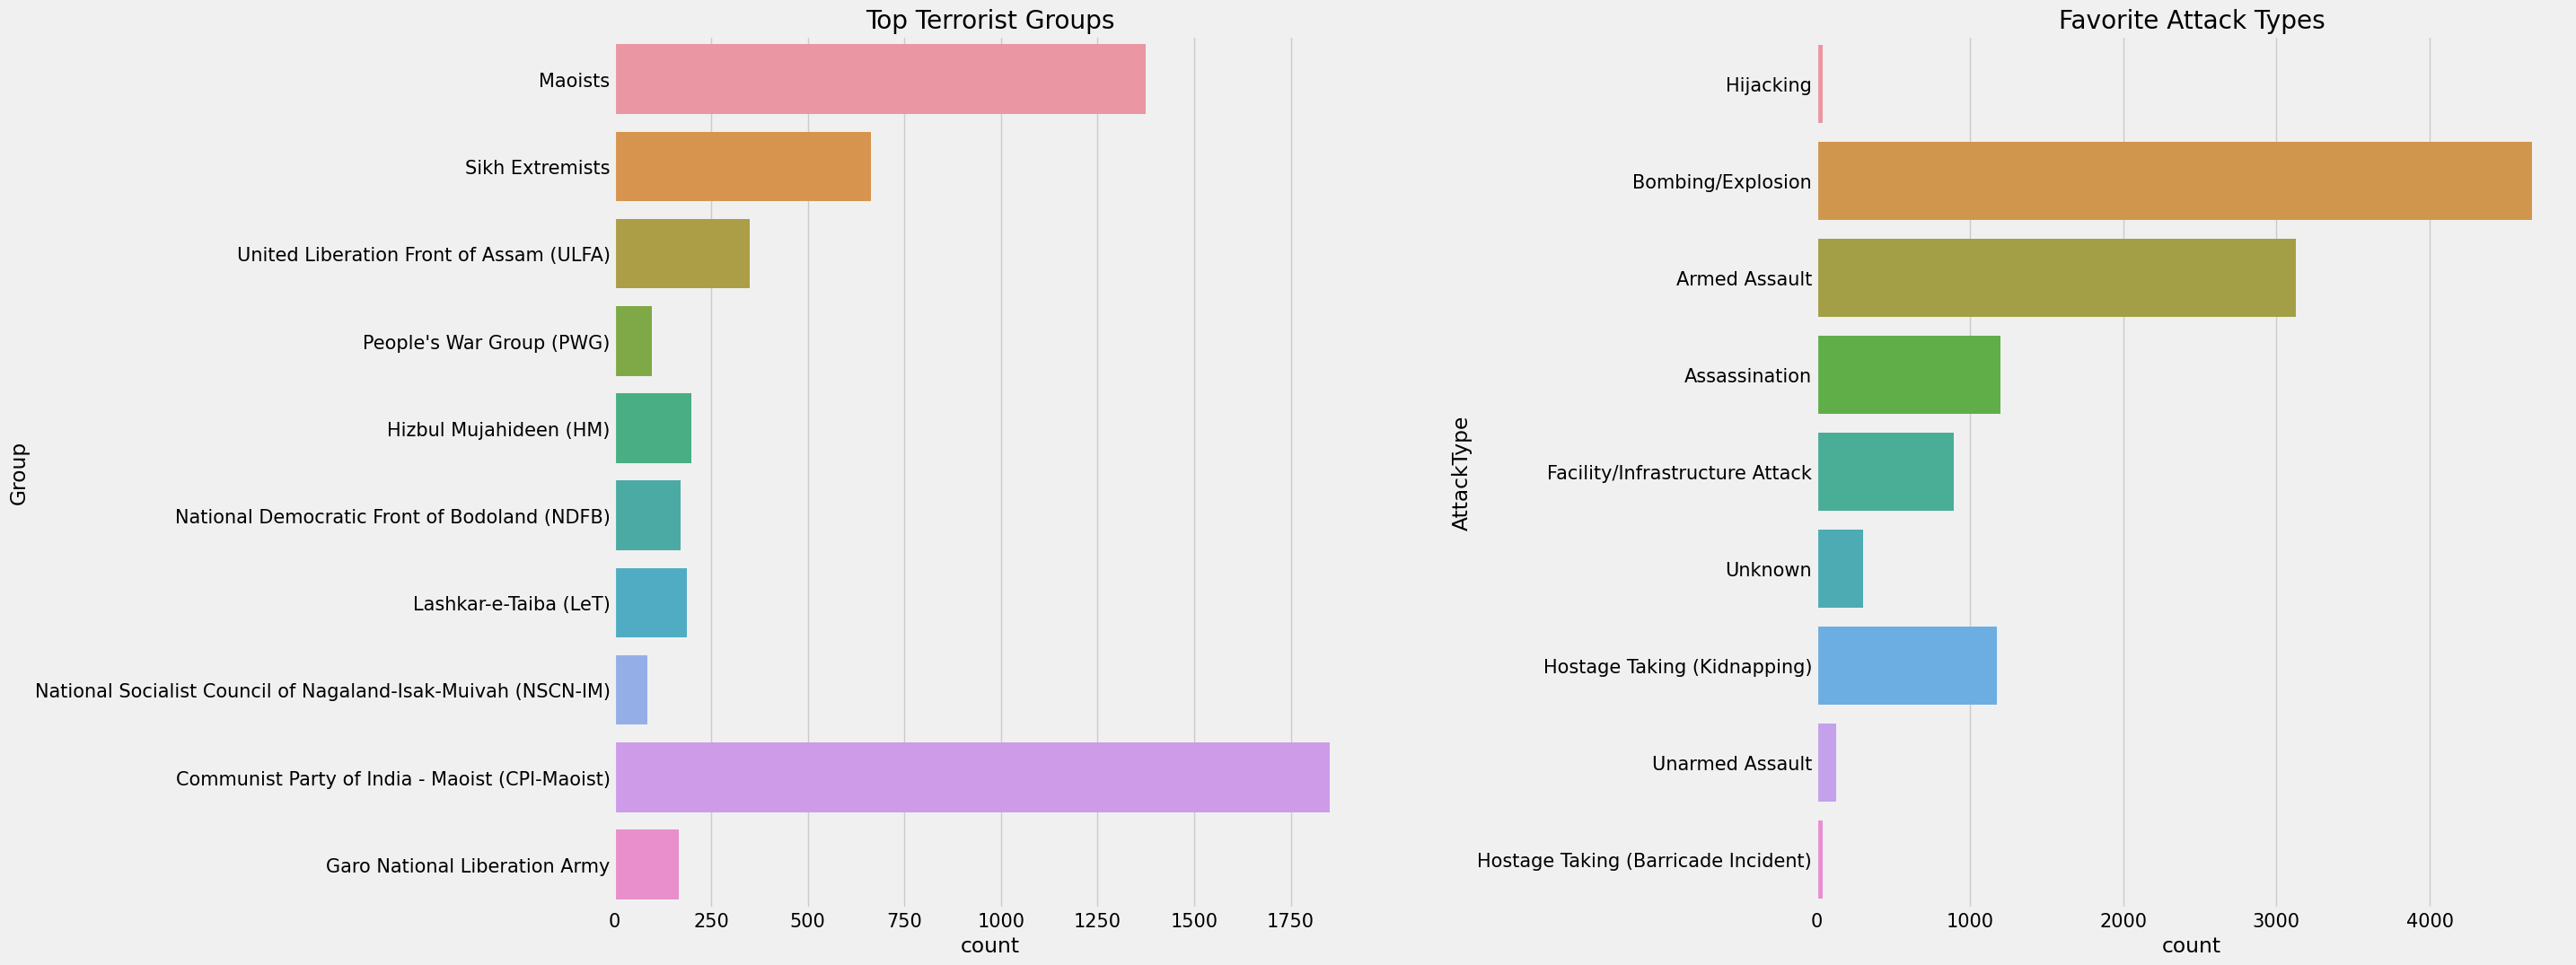

In [19]:
terror_india=df[df['Country']=='India']
f,ax=plt.subplots(1,2,figsize=(25,12))
ind_groups=terror_india['Group'].value_counts()[1:11].index
ind_groups=terror_india[terror_india['Group'].isin(ind_groups)]
sns.countplot(y='Group',data=ind_groups,ax=ax[0])
ax[0].set_title('Top Terrorist Groups')
sns.countplot(y='AttackType',data=terror_india,ax=ax[1])
ax[1].set_title('Favorite Attack Types')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

The Middle East and Southern Asia regions stand out as having the highest levels of terrorist activity, both in terms of the number of incidents and the resulting casualties. While terrorism is a global issue, there has been a notable increase in these activities in recent years, particularly in countries such as India, Pakistan, and Afghanistan.